In [2]:
import matplotlib.pyplot as plt
import keras
import numpy as np
import finetune_resnet
import h5py

In [3]:
model_path = "../models/"

In [4]:
model, _, _ = finetune_resnet.get_models(n_attributes=27)














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
dataset = h5py.File("../Market-1501/market.h5", "r")
list(dataset)

['test_images',
 'test_images_files',
 'test_labels',
 'train_images',
 'train_images_files',
 'train_labels']

In [6]:
x = dataset["train_images"]
y = dataset["train_labels"]
x.shape, y.shape

((12567, 128, 64, 3), (12567, 27))

In [7]:
model.compile("adam", "binary_crossentropy", metrics=[finetune_resnet.market_attribute_accuracy])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


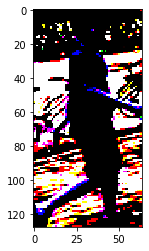

In [8]:
plt.imshow(finetune_resnet.preprocess_images(x[:1])[0])

In [9]:
print(*zip(y[:1][0], y.attrs["labels"]))
finetune_resnet.preprocess_labels(y[:1])

(2.0, 'age') (1.0, 'backpack') (1.0, 'bag') (2.0, 'clothes') (2.0, 'down') (1.0, 'downblack') (2.0, 'downblue') (1.0, 'downbrown') (1.0, 'downgray') (1.0, 'downgreen') (1.0, 'downpink') (1.0, 'downpurple') (1.0, 'downwhite') (1.0, 'downyellow') (1.0, 'gender') (1.0, 'hair') (1.0, 'handbag') (1.0, 'hat') (2.0, 'up') (1.0, 'upblack') (1.0, 'upblue') (1.0, 'upgray') (1.0, 'upgreen') (1.0, 'uppurple') (2.0, 'upred') (1.0, 'upwhite') (1.0, 'upyellow')


array([[0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [10]:
cb = [
    keras.callbacks.ModelCheckpoint(model_path + "market_attr_{val_market_attribute_accuracy:.2f}.h5", "val_acc"),
]

In [13]:
batch_size = 32
epochs = 5
sample = slice(0, 200)

history = model.fit(finetune_resnet.preprocess_images(np.array(x[sample])), finetune_resnet.preprocess_labels(np.array(y[sample])), batch_size, epochs, callbacks=cb, validation_split=0.2)

Train on 160 samples, validate on 40 samples
Epoch 1/5
160/160 [==============================] - 25s 158ms/step - loss: 0.0600 - market_attribute_accuracy: 0.9663 - val_loss: 0.9717 - val_market_attribute_accuracy: 0.6732
Epoch 2/5
160/160 [==============================] - 27s 166ms/step - loss: 0.0107 - market_attribute_accuracy: 0.9963 - val_loss: 1.2991 - val_market_attribute_accuracy: 0.6686
Epoch 3/5
160/160 [==============================] - 27s 170ms/step - loss: 0.0083 - market_attribute_accuracy: 0.9947 - val_loss: 1.6763 - val_market_attribute_accuracy: 0.6309
Epoch 4/5
160/160 [==============================] - 28s 176ms/step - loss: 0.0018 - market_attribute_accuracy: 0.9995 - val_loss: 1.8476 - val_market_attribute_accuracy: 0.6268
Epoch 5/5
160/160 [==============================] - 31s 194ms/step - loss: 0.0046 - market_attribute_accuracy: 0.9973 - val_loss: 1.4408 - val_market_attribute_accuracy: 0.6289


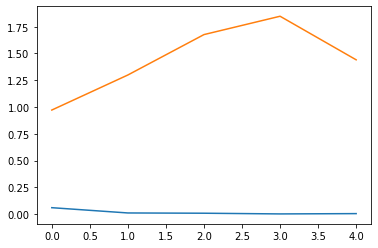

In [15]:
plt.plot(range(epochs), history.history["loss"])
plt.plot(range(epochs), history.history["val_loss"])

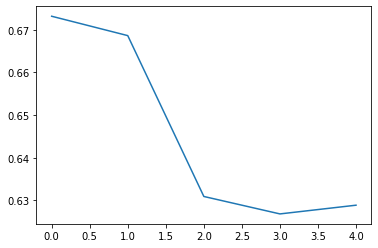

In [16]:
plt.plot(range(epochs), history.history["val_market_attribute_accuracy"])

In [34]:
ii = 2
res = model.predict(finetune_resnet.preprocess_images(x[ii:ii+1]))
print(*zip(np.round(res)[0], finetune_resnet.preprocess_labels(y[ii:ii+1])[0], y.attrs["labels"]), sep="\n")
model.evaluate(finetune_resnet.preprocess_images(x[ii:ii+1]), finetune_resnet.preprocess_labels(y[ii:ii+1]), batch_size=1, verbose=0)

(0.0, 0.0, 'age')
(0.0, 0.0, 'backpack')
(0.0, 0.0, 'bag')
(1.0, 1.0, 'clothes')
(1.0, 1.0, 'down')
(0.0, 0.0, 'downblack')
(1.0, 1.0, 'downblue')
(0.0, 0.0, 'downbrown')
(0.0, 0.0, 'downgray')
(0.0, 0.0, 'downgreen')
(0.0, 0.0, 'downpink')
(0.0, 0.0, 'downpurple')
(0.0, 0.0, 'downwhite')
(0.0, 0.0, 'downyellow')
(0.0, 0.0, 'gender')
(0.0, 0.0, 'hair')
(0.0, 0.0, 'handbag')
(0.0, 0.0, 'hat')
(1.0, 1.0, 'up')
(0.0, 0.0, 'upblack')
(0.0, 0.0, 'upblue')
(0.0, 0.0, 'upgray')
(0.0, 0.0, 'upgreen')
(0.0, 0.0, 'uppurple')
(1.0, 1.0, 'upred')
(0.0, 0.0, 'upwhite')
(0.0, 0.0, 'upyellow')


[3.354679620315437e-06, 1.0000001192092896]